In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz #descomprime el fichero
!pip install -q findspark #instala spark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" #funciones dels sistema de python para cambiar variables de entorno y que funcione
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"
import findspark #para tener un contexto spark donde trabajar
findspark.init()
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate() #para generar una spark sesion sql

ValueError: ignored

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
nba = sc.textFile("partidosLigaNBA.csv") #cargar el dataset como RDD

In [23]:
nba.count() #función para contar, en una RDD, cuántas filas hay

12908

In [31]:
nba.take(7)

['Date:Start..ET.:Visitor.Neutral:PTS:Home.Neutral:PTS.1',
 'Tue, Oct 30, 2007:"7:30 pm":Utah Jazz:117:Golden State Warriors:96',
 'Tue, Oct 30, 2007:"7:30 pm":Houston Rockets:95:Los Angeles Lakers:93',
 'Tue, Oct 30, 2007:"7:00 pm":Portland Trail Blazers:97:San Antonio Spurs:106',
 'Wed, Oct 31, 2007:"8:00 pm":Dallas Mavericks:92:Cleveland Cavaliers:74',
 'Wed, Oct 31, 2007:"8:30 pm":Seattle SuperSonics:103:Denver Nuggets:120',
 'Wed, Oct 31, 2007:"7:00 pm":Washington Wizards:110:Indiana Pacers:119']

In [32]:
top_nba = nba.take(1)[0] 
nba_filter = nba.filter(lambda x: x != top_nba) 
nba_filter.take(7) 

['Tue, Oct 30, 2007:"7:30 pm":Utah Jazz:117:Golden State Warriors:96',
 'Tue, Oct 30, 2007:"7:30 pm":Houston Rockets:95:Los Angeles Lakers:93',
 'Tue, Oct 30, 2007:"7:00 pm":Portland Trail Blazers:97:San Antonio Spurs:106',
 'Wed, Oct 31, 2007:"8:00 pm":Dallas Mavericks:92:Cleveland Cavaliers:74',
 'Wed, Oct 31, 2007:"8:30 pm":Seattle SuperSonics:103:Denver Nuggets:120',
 'Wed, Oct 31, 2007:"7:00 pm":Washington Wizards:110:Indiana Pacers:119',
 'Wed, Oct 31, 2007:"7:00 pm":San Antonio Spurs:104:Memphis Grizzlies:101']

In [30]:
#separar por : con map

nba_filter = nba.filter(lambda x: x != top_nba).map(lambda x: x.split(":")) #Realizamos el split para que nos separe las columnas 
nba_filter.take(7) 

[['Tue, Oct 30, 2007',
  '"7',
  '30 pm"',
  'Utah Jazz',
  '117',
  'Golden State Warriors',
  '96'],
 ['Tue, Oct 30, 2007',
  '"7',
  '30 pm"',
  'Houston Rockets',
  '95',
  'Los Angeles Lakers',
  '93'],
 ['Tue, Oct 30, 2007',
  '"7',
  '00 pm"',
  'Portland Trail Blazers',
  '97',
  'San Antonio Spurs',
  '106'],
 ['Wed, Oct 31, 2007',
  '"8',
  '00 pm"',
  'Dallas Mavericks',
  '92',
  'Cleveland Cavaliers',
  '74'],
 ['Wed, Oct 31, 2007',
  '"8',
  '30 pm"',
  'Seattle SuperSonics',
  '103',
  'Denver Nuggets',
  '120'],
 ['Wed, Oct 31, 2007',
  '"7',
  '00 pm"',
  'Washington Wizards',
  '110',
  'Indiana Pacers',
  '119'],
 ['Wed, Oct 31, 2007',
  '"7',
  '00 pm"',
  'San Antonio Spurs',
  '104',
  'Memphis Grizzlies',
  '101']]

In [40]:
nba_filter = nba.filter(lambda x: x != top_nba).map(lambda x: x.split(":")[-1]) 
nba_filter.take(7)

['96', '93', '106', '74', '120', '119', '101']

In [54]:
#Selección del elemento del vector generado, y casteado a numérico.

nba_filter = nba.filter(lambda v: v != top_nba) \
                      .map(lambda v: v.split(":")[-1]) \
                      .filter(lambda v_visit: v_visit.isdigit()) \
                      .map(lambda v_dest: int(v_dest))

In [63]:
#Comprobación de que todos los valores son dígitos.
for i in range(500):
  print(type(nba_filter.take(500)[i])) #Intervalo elegido para el histograma

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

In [64]:
nba_filter.take(500)

[96,
 93,
 106,
 74,
 120,
 119,
 101,
 112,
 104,
 102,
 106,
 80,
 99,
 95,
 101,
 103,
 102,
 85,
 110,
 87,
 120,
 91,
 69,
 113,
 92,
 98,
 96,
 123,
 89,
 111,
 78,
 88,
 133,
 82,
 88,
 92,
 115,
 119,
 88,
 97,
 103,
 95,
 107,
 83,
 91,
 104,
 89,
 104,
 112,
 103,
 87,
 119,
 104,
 105,
 119,
 89,
 94,
 93,
 88,
 98,
 96,
 103,
 97,
 115,
 87,
 106,
 96,
 103,
 104,
 107,
 101,
 85,
 102,
 103,
 110,
 91,
 101,
 92,
 71,
 106,
 101,
 96,
 91,
 100,
 118,
 90,
 82,
 95,
 72,
 72,
 113,
 103,
 122,
 82,
 117,
 91,
 99,
 86,
 105,
 103,
 113,
 102,
 107,
 117,
 91,
 116,
 110,
 104,
 90,
 84,
 95,
 102,
 108,
 95,
 88,
 103,
 105,
 112,
 123,
 92,
 99,
 122,
 103,
 118,
 89,
 70,
 92,
 123,
 90,
 110,
 100,
 108,
 115,
 105,
 117,
 73,
 105,
 82,
 87,
 109,
 106,
 104,
 105,
 100,
 101,
 125,
 88,
 102,
 83,
 107,
 105,
 112,
 114,
 82,
 98,
 116,
 105,
 111,
 98,
 94,
 101,
 89,
 79,
 110,
 86,
 93,
 127,
 101,
 128,
 107,
 99,
 83,
 111,
 98,
 105,
 113,
 87,
 101,
 93,
 99,
 

In [72]:
difMaxMin =  (nba_filter.max() - nba_filter.min()) / 5 #Calculo el rango haciendo la diferencia entre el número mayor (168) y el menor (59), que tiene que tener cada intervalo para poder dividirlo en 5 subgrupos
difMaxMin

21.8

In [89]:
#Definimos la función intervalo, pasándole por parámetro el dato, para que lo clasifique en un tipo

def interval(dato):
  if dato< 80.8 :
    return 'int 1'
  elif dato < 102.6:
    return 'int 2'
  elif dato <124.4:
    return 'int 3'
  elif dato <146.2:
    return 'int 4'
  elif dato <=168:
   return 'int 5'

In [115]:
nba_filter_interval = nba.filter(lambda s: s != top_nba) \
                      .map(lambda s: s.split(":")[-1]) \
                      .filter(lambda s_pvisit: s_pvisit.isdigit()) \
                      .map(lambda d_pvisit: int(d_pvisit)) \
                      .map(lambda x : (interval(x),1)) \
                      .reduceByKey(lambda a, b: a + b) \
                      .collect()



In [141]:
nba_filter_interval.sort() #Ordenamos los intervalos
nba_filter_interval



[('int 1', 476),
 ('int 2', 6412),
 ('int 3', 5549),
 ('int 4', 454),
 ('int 5', 6)]

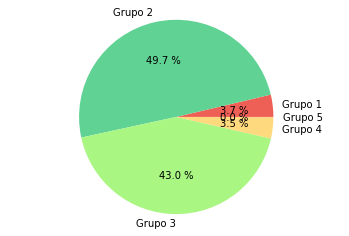

In [143]:
valores = [476,6412,5549,454,6]
nombres = ["Grupo 1","Grupo 2","Grupo 3","Grupo 4","Grupo 5"]
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
plt.pie(valores, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

In [117]:
df_nba_filter_interval = pd.DataFrame(nba_filter_interval) #Lo convertimos a DataFrame


([<matplotlib.axis.YTick at 0x7f9e80c70a20>,
 <a list of 5 Text major ticklabel objects>)

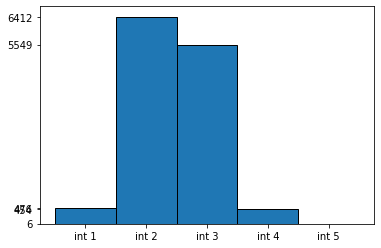

In [127]:
labels, ys = zip(*nba_filter_interval)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center', alpha=1, edgecolor = 'black',  linewidth=1)

plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
 